# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
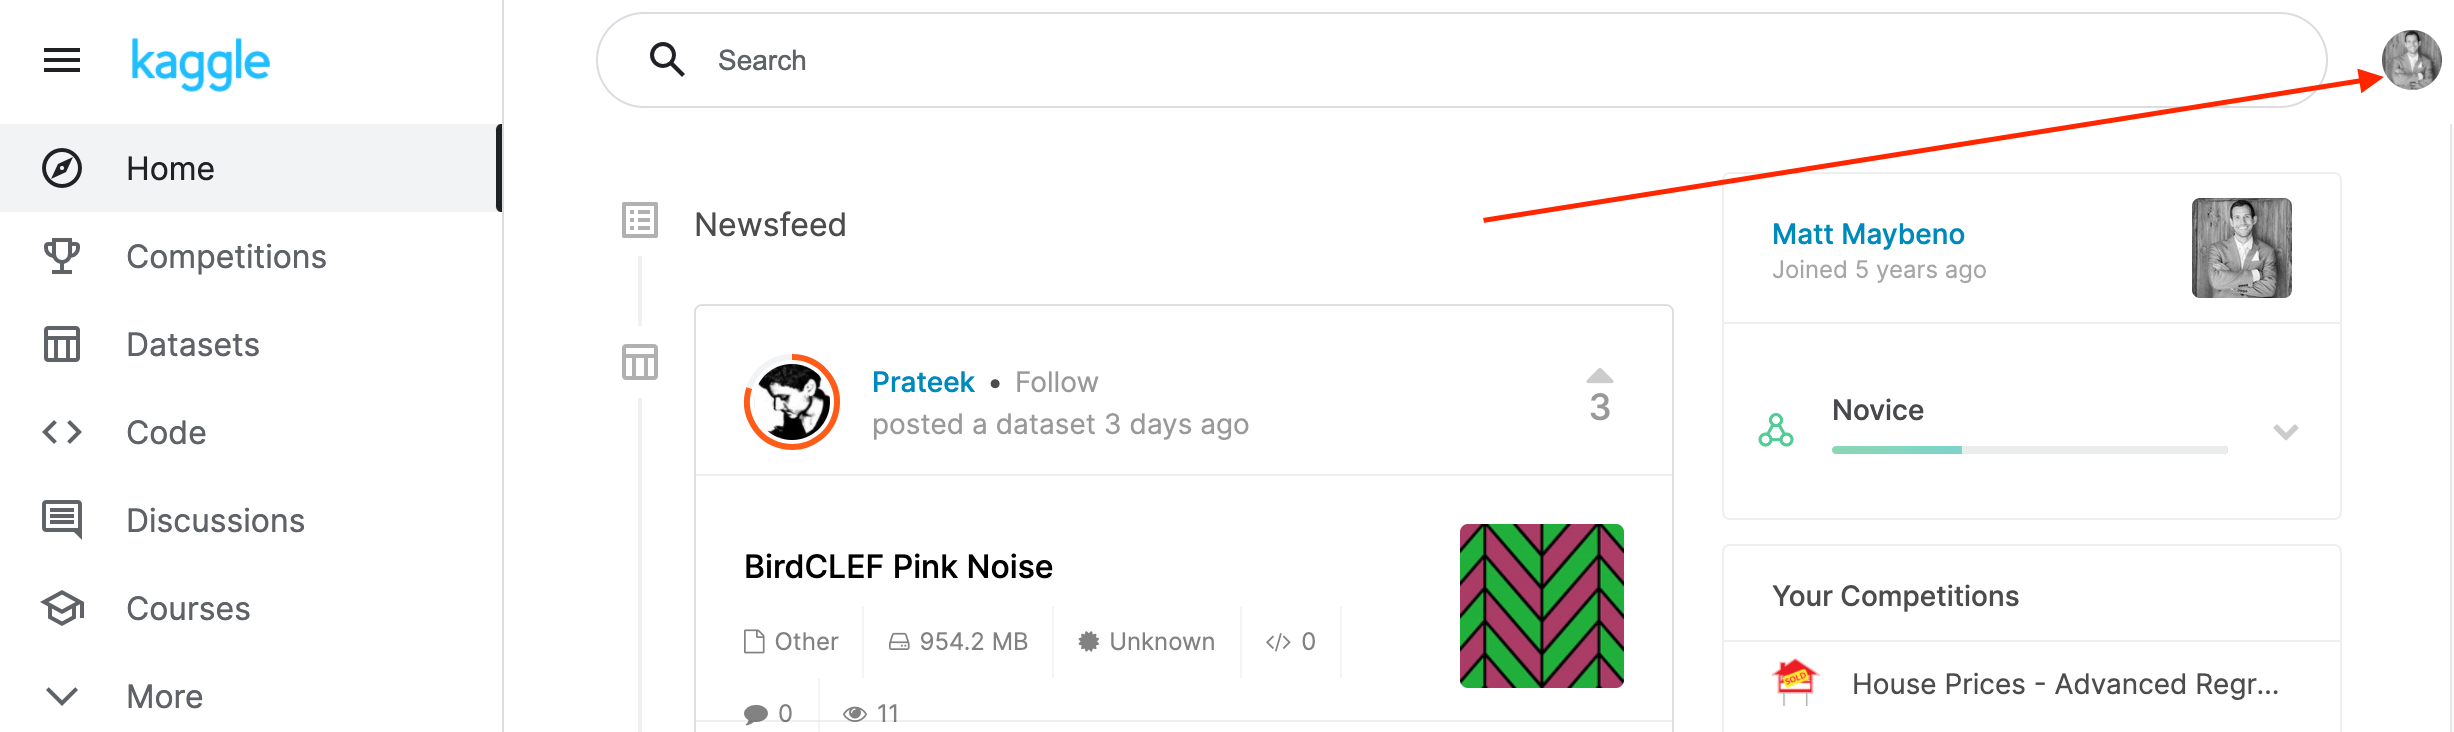
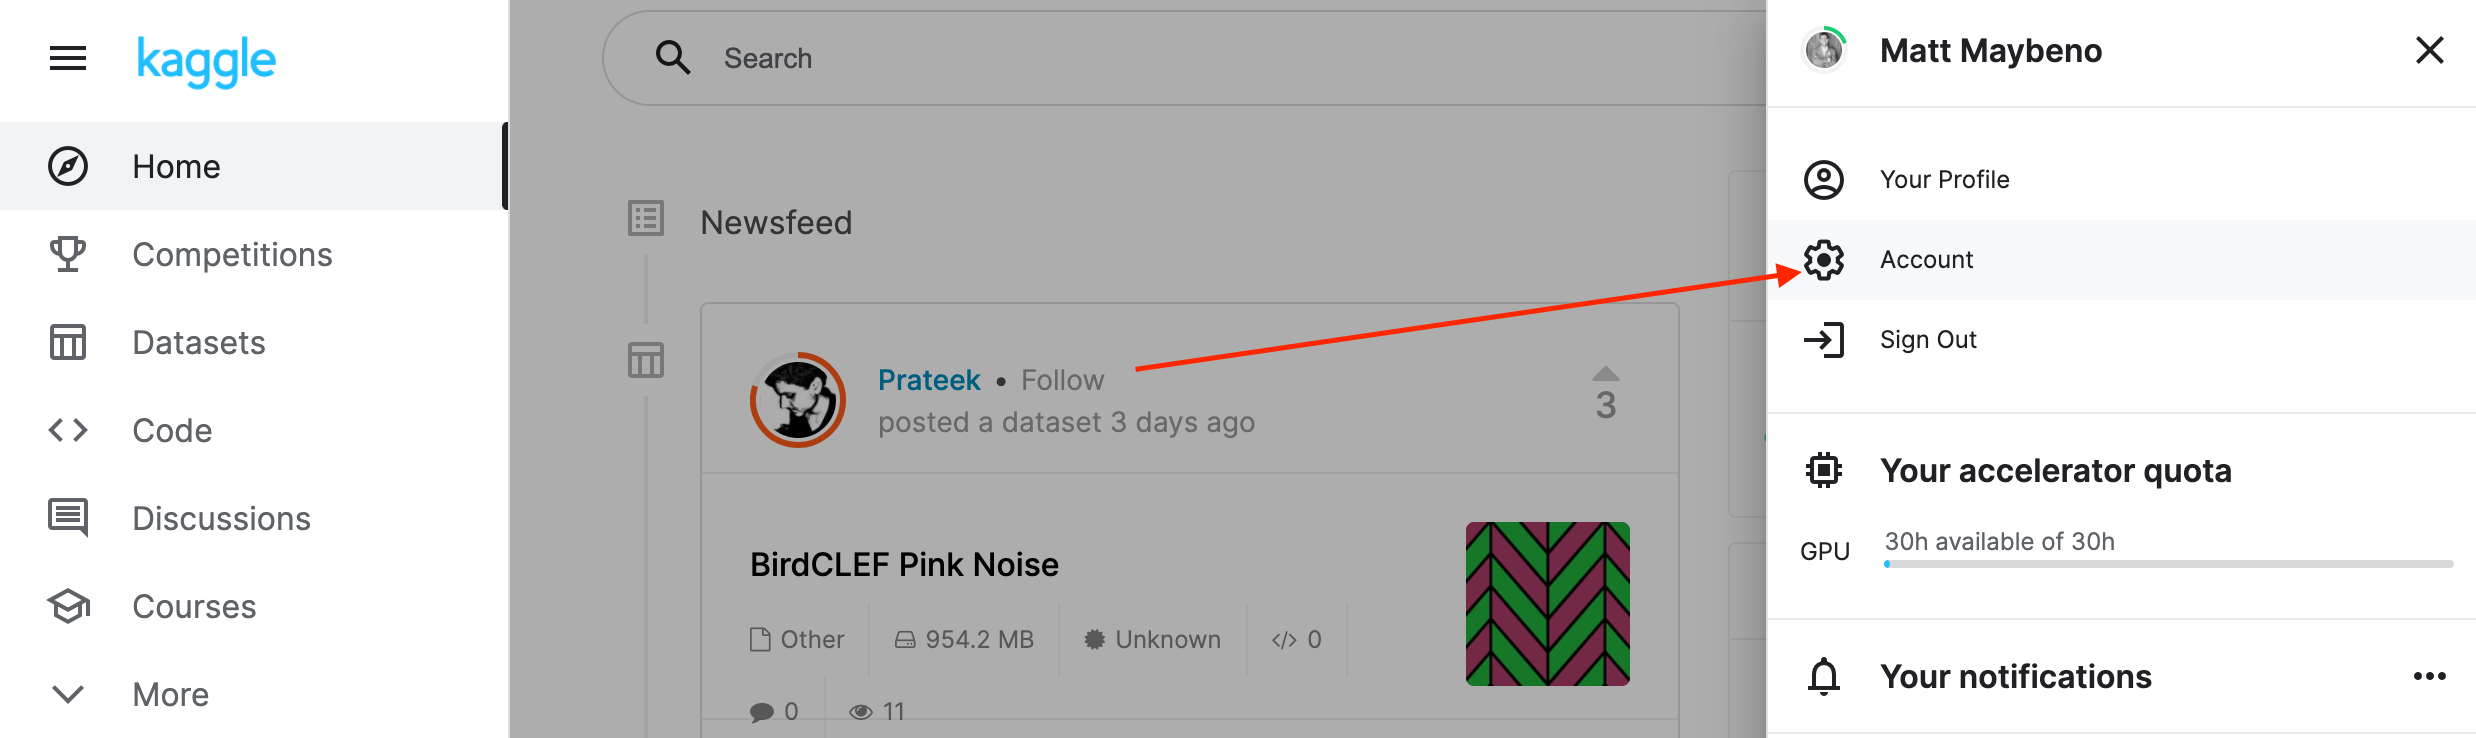
2. Scroll down to API and click Create New API Token.
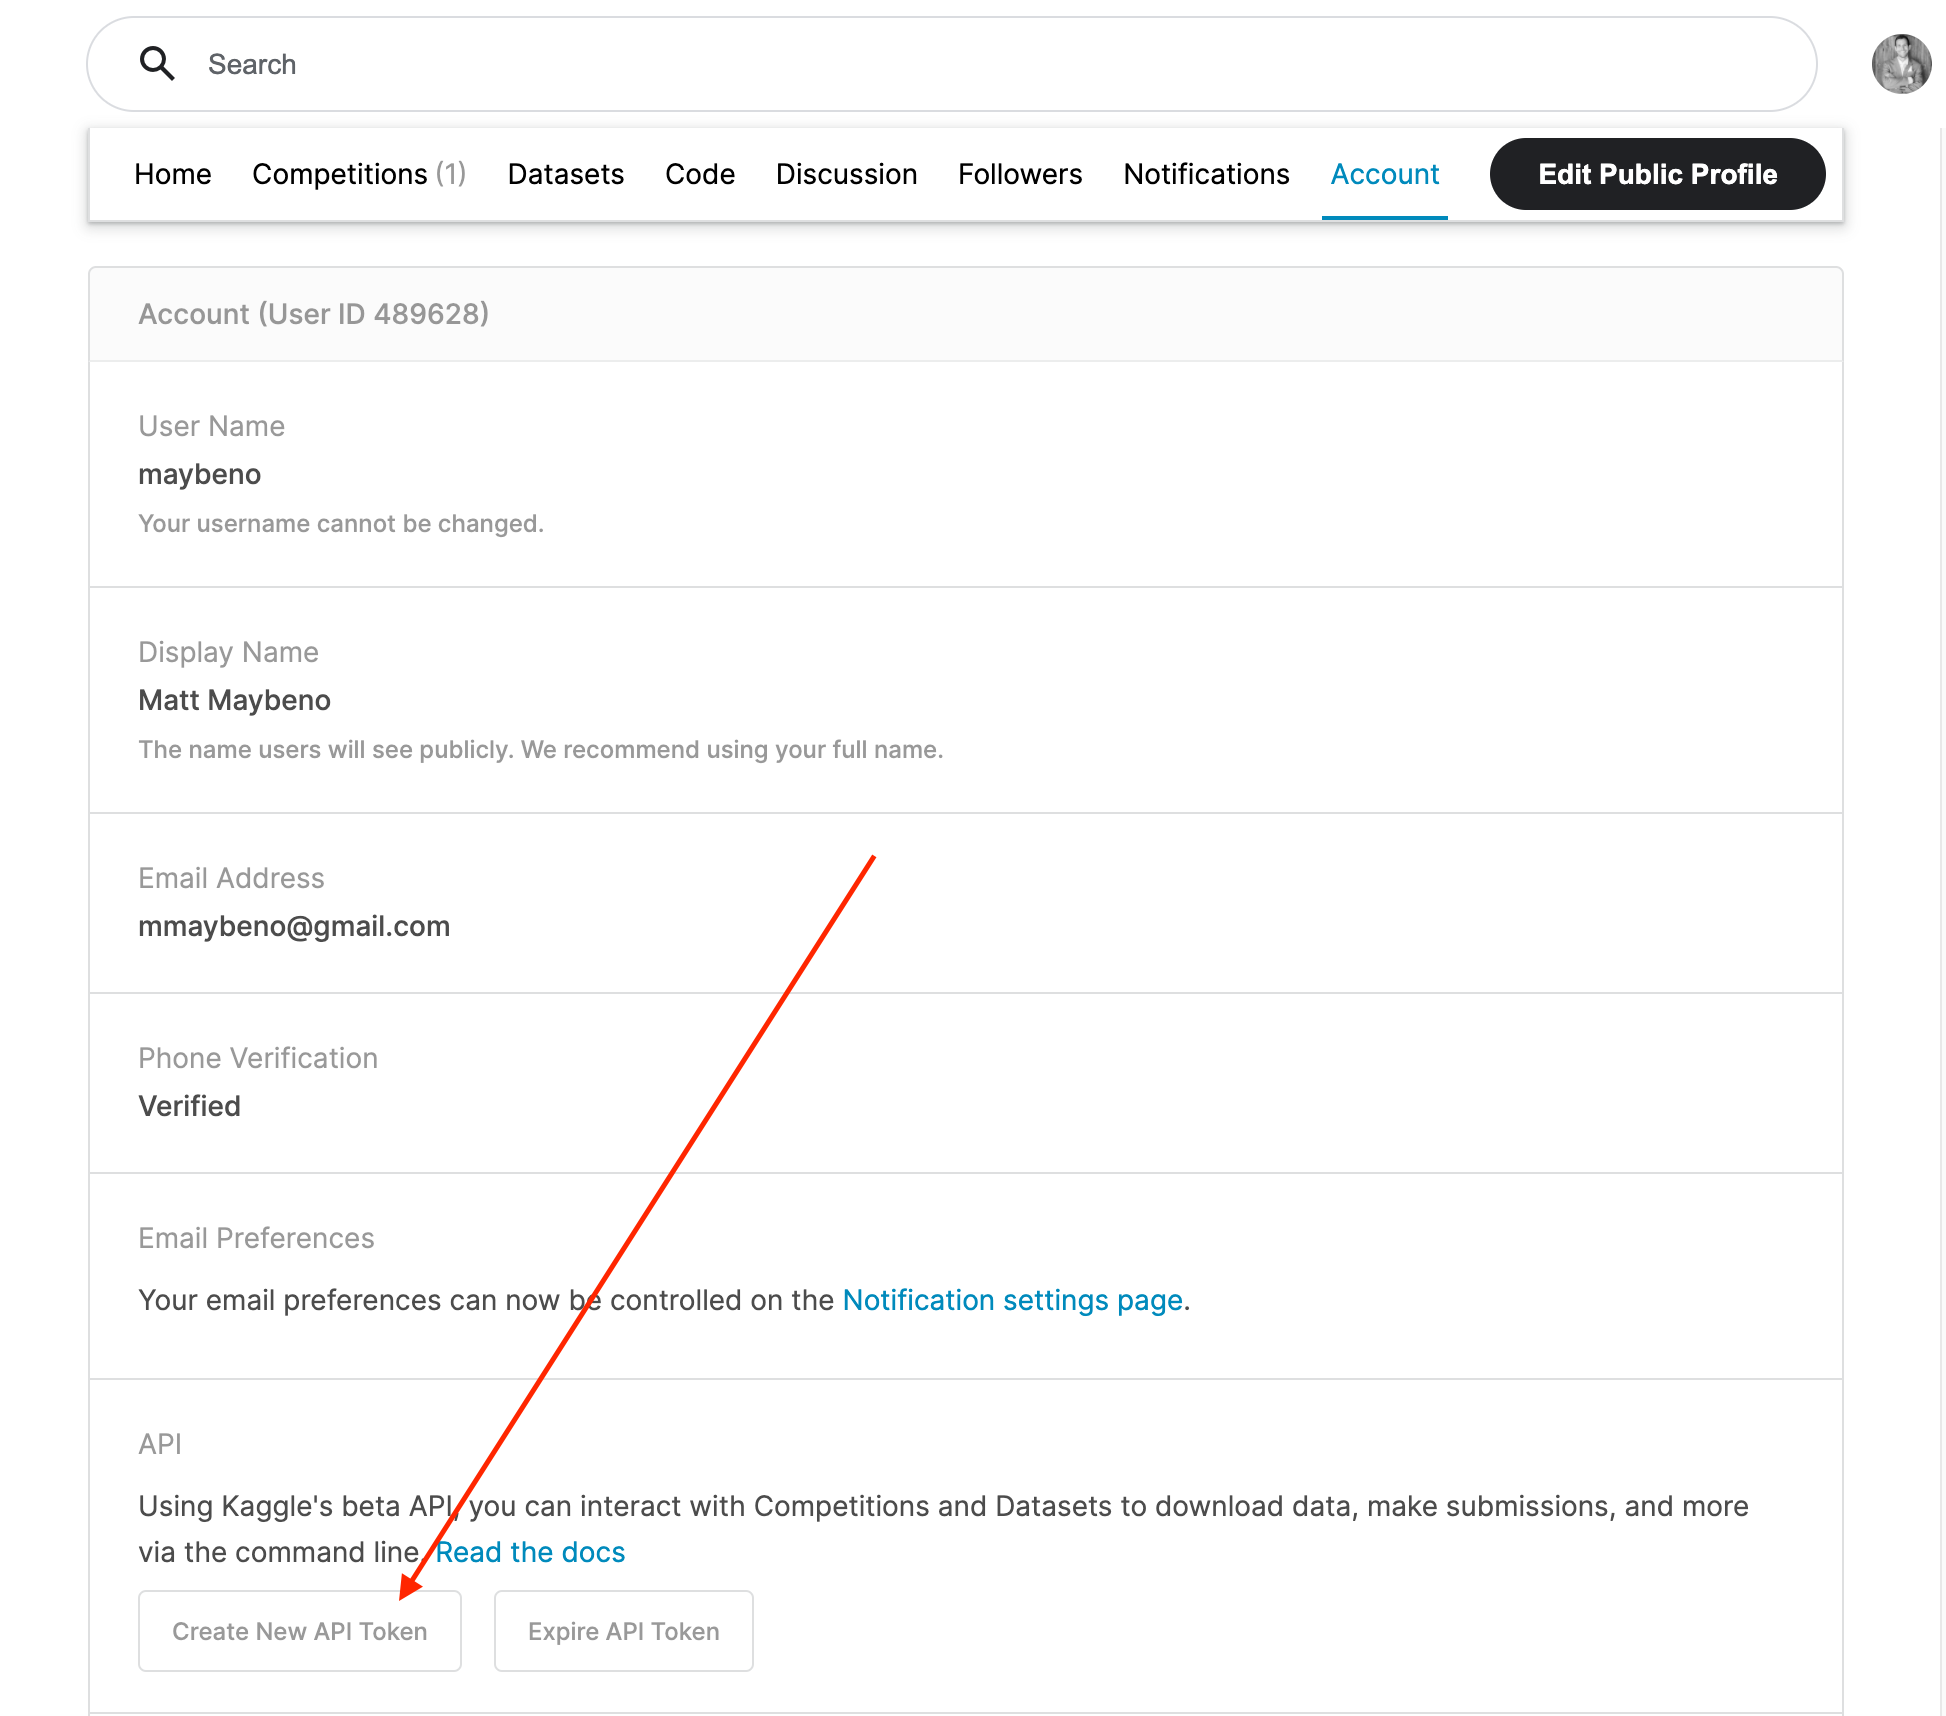
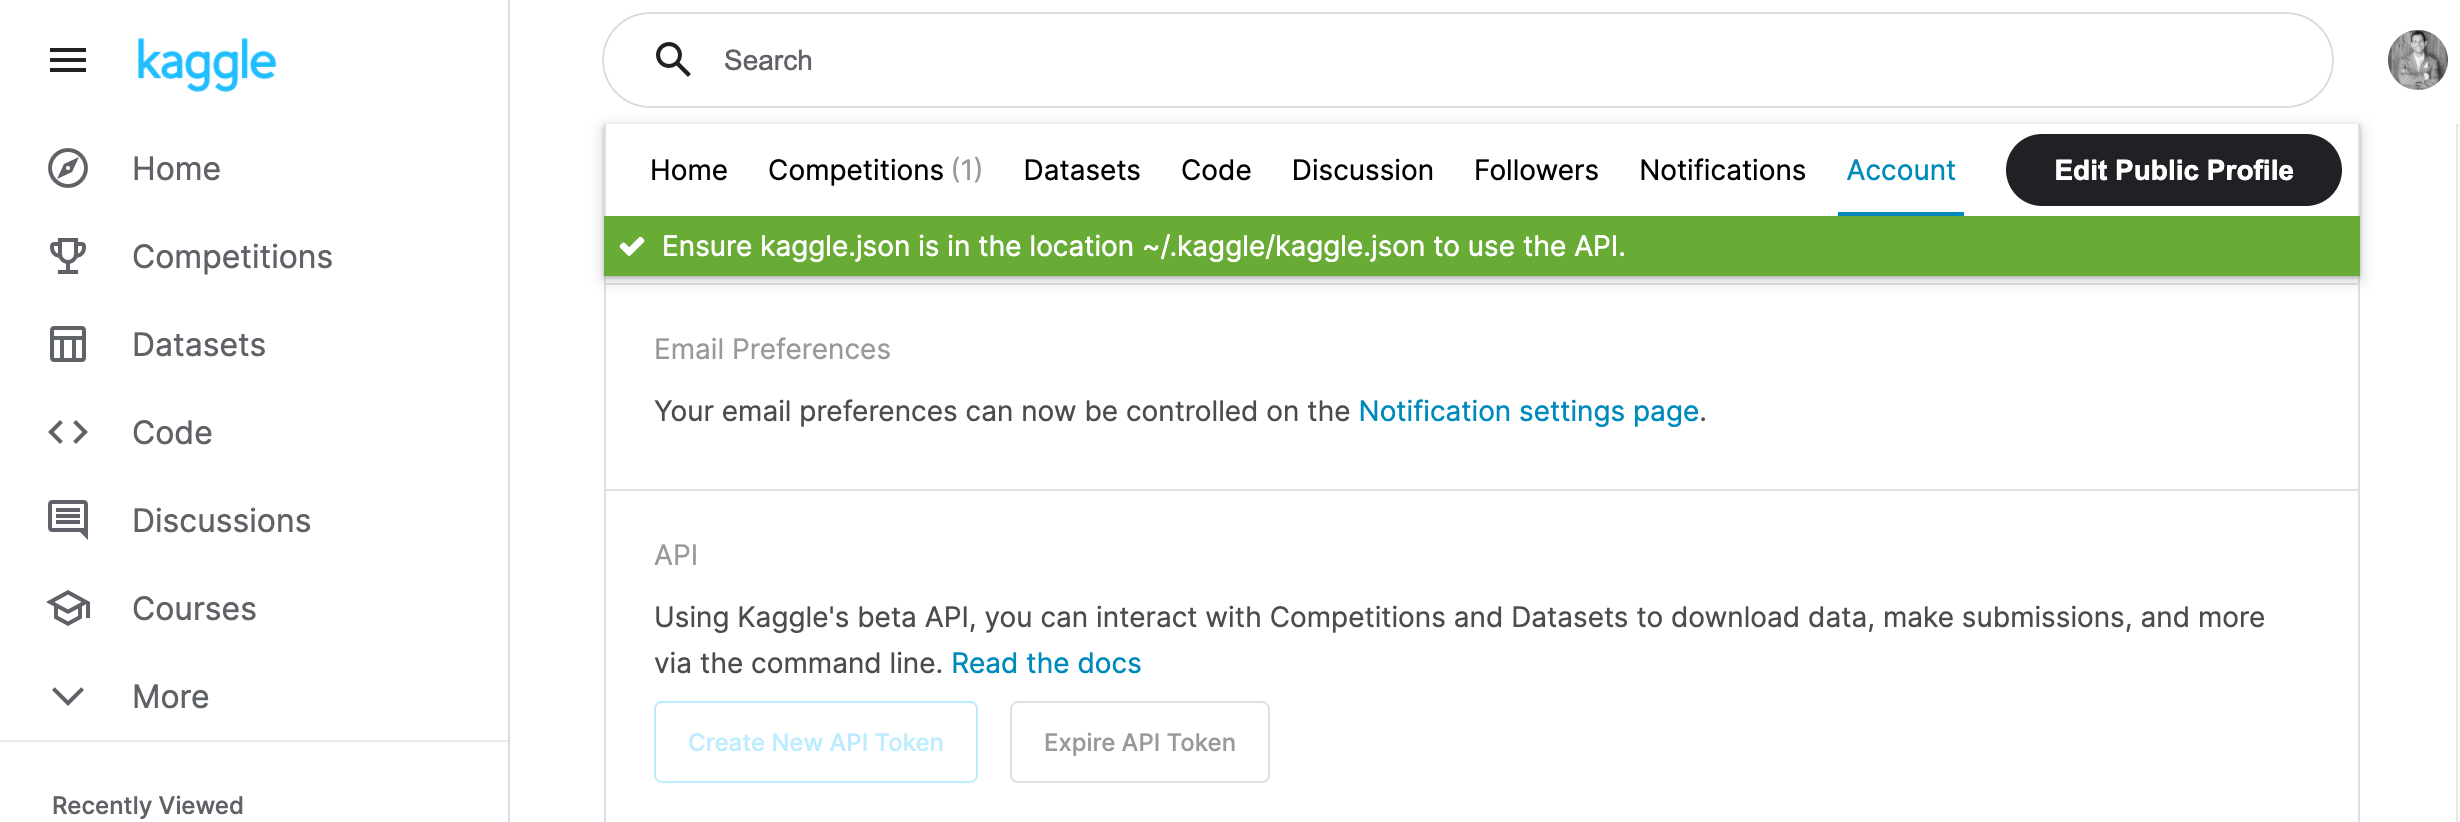
3. Open up `kaggle.json` and use the username and key.
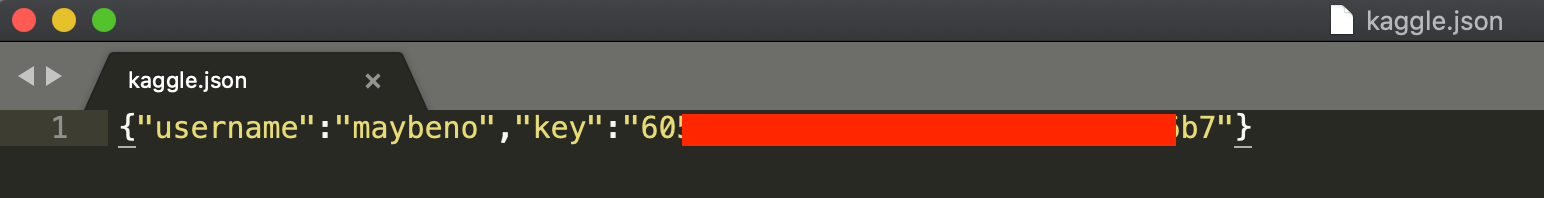

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [3]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Using cached setuptools-60.5.0-py3-none-any.whl (958 kB)
  Using cached wheel-0.37.1-py2.py3-none-any.whl (35 kB)
  Attempting uninstall: wheel
    Found existing installation: wheel

### Setup Kaggle API Key

In [3]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "pierresiccardi"
kaggle_key = "d50f9d8679b0e372286b5fbdec6ed964"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
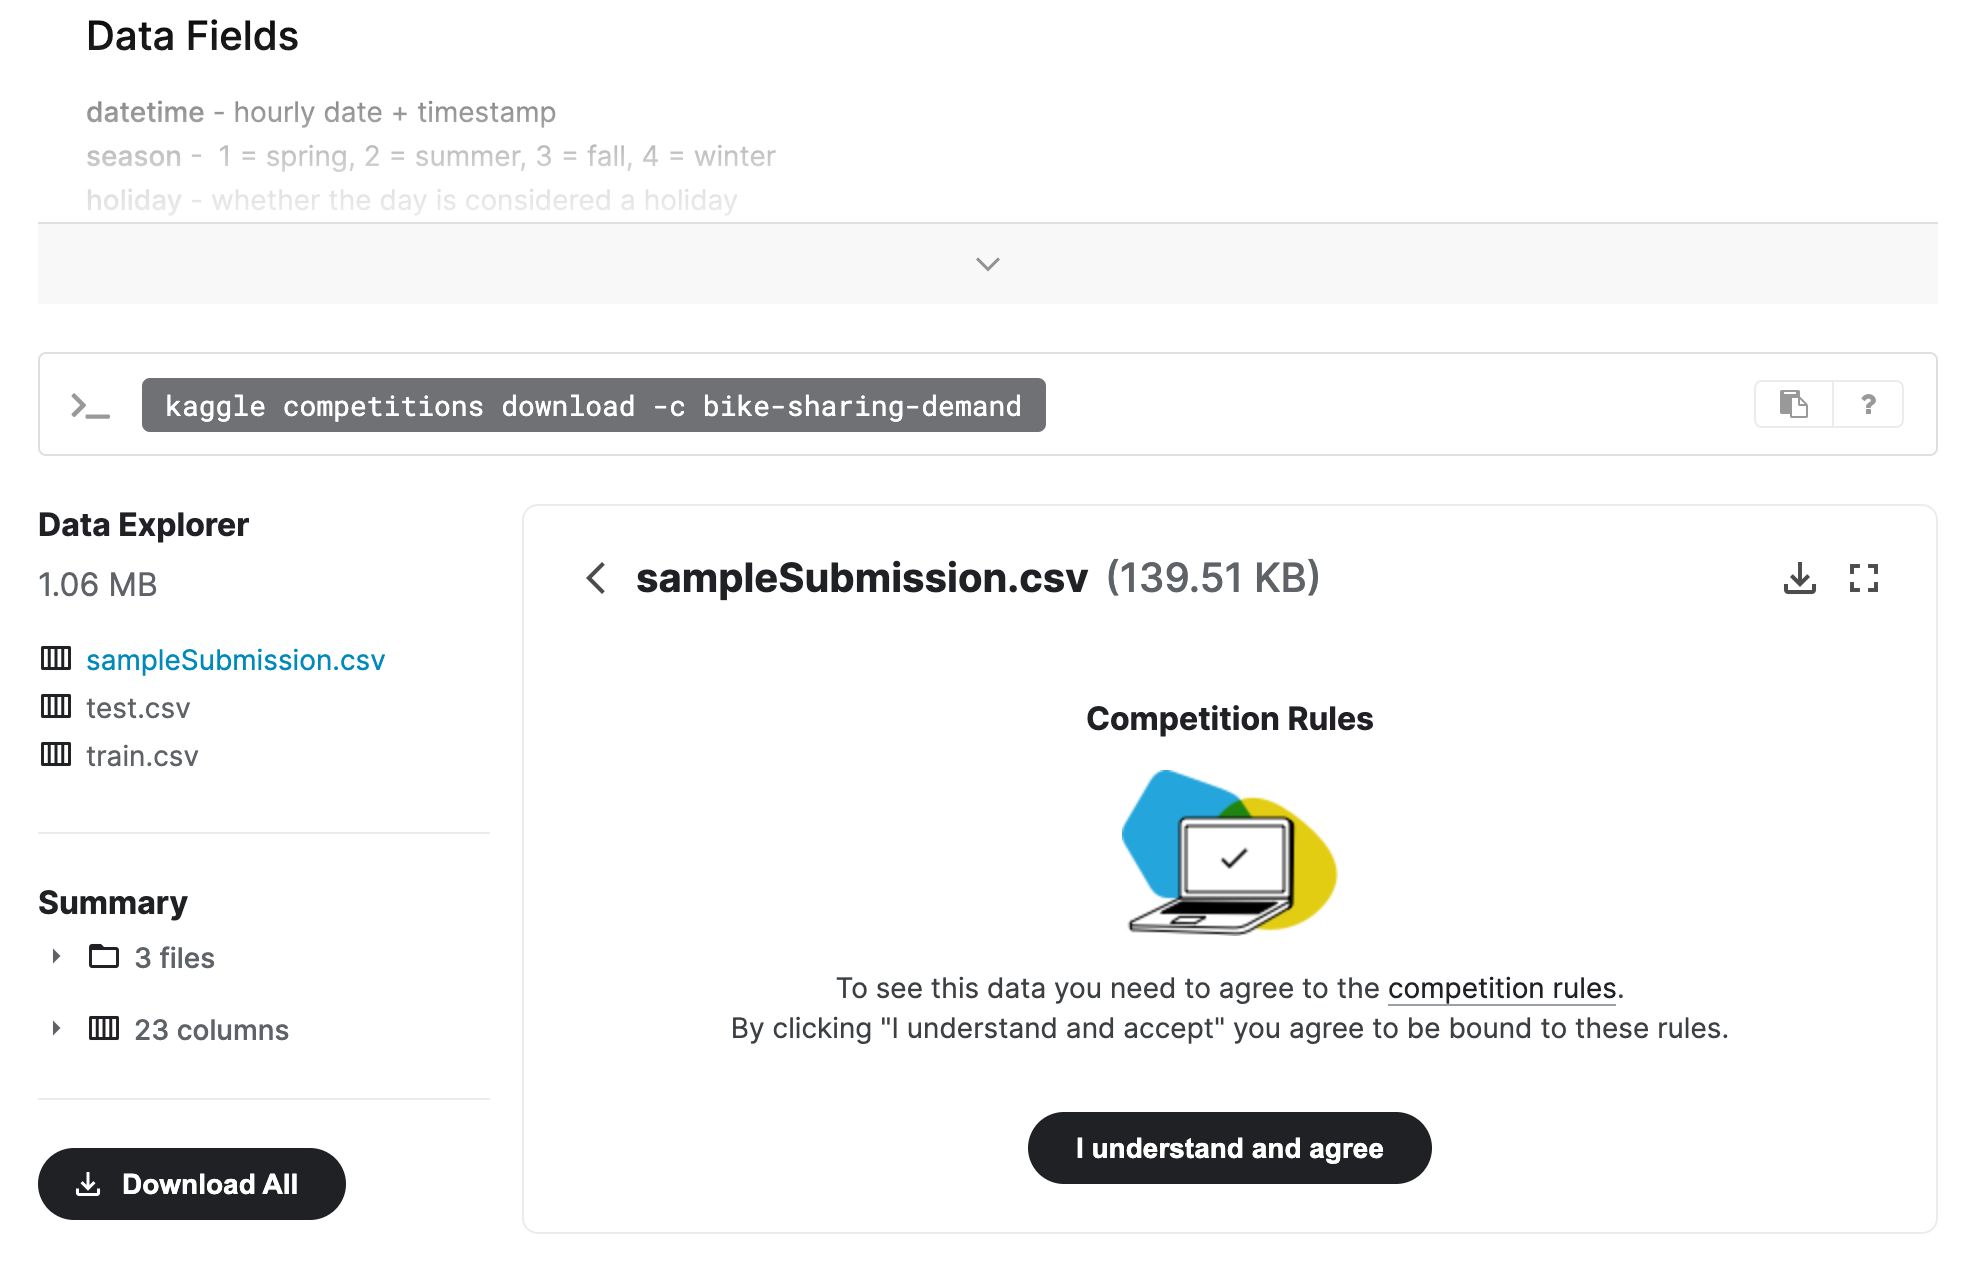

In [5]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0%|                                                | 0.00/189k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 189k/189k [00:00<00:00, 6.16MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [5]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [6]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv')
train['datetime']= pd.to_datetime(train['datetime'])
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [9]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [7]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv')
test['datetime']= pd.to_datetime(test['datetime'])
test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2 2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3 2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4 2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014

In [8]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv')
submission['datetime']= pd.to_datetime(submission['datetime'])
submission.head()

datetime  count
0 2011-01-20 00:00:00      0
1 2011-01-20 01:00:00      0
2 2011-01-20 02:00:00      0
3 2011-01-20 03:00:00      0
4 2011-01-20 04:00:00      0

## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [15]:
predictor = TabularPredictor(label = 'count', eval_metric='root_mean_squared_error').fit(train.drop(['casual','registered'],axis=1),time_limit=600,presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20220128_141349/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220128_141349/"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 9
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    3044.9 MB
	Train Data (Original)  Memory Usage: 0.78 MB (0.0% of available memory)
	Inferring data type of each feature based on column val

[1000]	train_set's rmse: 123.806	valid_set's rmse: 134.369
[2000]	train_set's rmse: 117.412	valid_set's rmse: 133.705


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 123.42	valid_set's rmse: 141.5


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 125.097	valid_set's rmse: 128.797
[2000]	train_set's rmse: 119.003	valid_set's rmse: 127.909
[3000]	train_set's rmse: 114.63	valid_set's rmse: 127.431
[4000]	train_set's rmse: 111.295	valid_set's rmse: 126.943
[5000]	train_set's rmse: 108.576	valid_set's rmse: 126.844
[6000]	train_set's rmse: 106.085	valid_set's rmse: 126.71


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.131	valid_set's rmse: 138.303
[2000]	train_set's rmse: 117.833	valid_set's rmse: 137.535


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.871	valid_set's rmse: 128.052
[2000]	train_set's rmse: 118.547	valid_set's rmse: 127.003
[3000]	train_set's rmse: 114.124	valid_set's rmse: 126.834
[4000]	train_set's rmse: 110.645	valid_set's rmse: 126.694


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.654	valid_set's rmse: 135.095
[2000]	train_set's rmse: 118.764	valid_set's rmse: 133.849
[3000]	train_set's rmse: 114.615	valid_set's rmse: 133.509
[4000]	train_set's rmse: 111.249	valid_set's rmse: 133.472
[5000]	train_set's rmse: 108.455	valid_set's rmse: 133.281


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.01	valid_set's rmse: 139.355
[2000]	train_set's rmse: 117.819	valid_set's rmse: 138.312
[3000]	train_set's rmse: 113.4	valid_set's rmse: 137.886
[4000]	train_set's rmse: 110.032	valid_set's rmse: 137.758


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.47	valid_set's rmse: 135.412


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.18	valid_set's rmse: 137.579
[2000]	train_set's rmse: 117.782	valid_set's rmse: 136.664
[3000]	train_set's rmse: 113.447	valid_set's rmse: 136.246
[4000]	train_set's rmse: 109.982	valid_set's rmse: 136.227


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.641	valid_set's rmse: 132.484


	-134.0883	 = Validation score   (root_mean_squared_error)
	41.46s	 = Training   runtime
	2.29s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 348.87s of the 548.92s of remaining time.
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' arg

[1000]	train_set's rmse: 96.0217	valid_set's rmse: 123.249


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 94.7479	valid_set's rmse: 135.635


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 95.3055	valid_set's rmse: 132.087


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 95.1635	valid_set's rmse: 131.521


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	-132.2864	 = Validation score   (root_mean_squared_error)
	10.92s	 = Training   runtime
	0.46s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 335.41s of the 535.47s of remaining time.
	-118.4567	 = Validation score   (root_mean_squared_error)
	7.49s	 = Training   runtime

### Review AutoGluon's training run with ranking of models that did the best.

In [16]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3 -115.105349       7.442686  508.844573                0.000576           0.257537            3       True         19
1   NeuralNetFastAI_BAG_L2 -115.734534       6.481505  472.691261                0.405822         102.111919            2       True         17
2        LightGBMXT_BAG_L2 -116.383883       6.383390  380.298086                0.307707           9.718745            2       True         12
3          CatBoost_BAG_L2 -116.596111       6.107921  396.253568                0.032238          25.674227            2       True         15
4          LightGBM_BAG_L2 -117.065808       6.196753  377.939629                0.121070           7.360288            2       True         13
5           XGBoost_BAG_L2 -117.445528       6.155964  383.078089         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetMXNet_BAG_L1': 'StackerEnsembleModel_TabularNeuralNet',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L2': 'StackerEnsembleModel_XGB

### Create predictions from test dataset

In [25]:
predictions = predictor.predict(test)
predictions.head()

0     97.438972
1     93.350586
2     93.351768
3    110.176003
4    110.107643
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [26]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      211.994415
std       128.647888
min        -9.840977
25%       107.515656
50%       195.094635
75%       298.799744
max       658.635864
Name: count, dtype: float64

In [27]:
# How many negative values do we have?
predictions.lt(0).sum()

2

In [35]:
# Set them to zero
predictions[predictions < 0] = 0
predictions.lt(0).sum()

0

### Set predictions to submission dataframe, save, and submit

In [36]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [37]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 469kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [38]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                 description           status    publicScore  privateScore  
--------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv  2022-01-28 15:06:39  first raw submission  complete  1.39382      1.39382       


# Initial score of 1.39

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f95e0537750>,
      dtype=object)

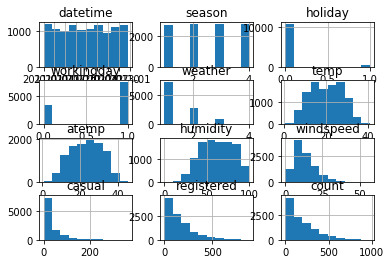

In [40]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist()

In [9]:
# create a new feature
train['hour'] = pd.to_datetime(train['datetime']).dt.hour
train['day'] = pd.to_datetime(train['datetime']).dt.day
train['month'] = pd.to_datetime(train['datetime']).dt.month
test['hour'] = pd.to_datetime(test['datetime']).dt.hour
test['day'] = pd.to_datetime(test['datetime']).dt.day
test['month'] = pd.to_datetime(test['datetime']).dt.month

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [10]:
train["season"] = train["season"].astype("category") 
train["weather"] = train["weather"].astype("category") 
test["season"] = test["season"].astype("category") 
test["weather"] = test["weather"].astype("category") 

In [43]:
# View are new feature
train.head()

datetime season  holiday  workingday weather  temp   atemp  \
0 2011-01-01 00:00:00      1        0           0       1  9.84  14.395   
1 2011-01-01 01:00:00      1        0           0       1  9.02  13.635   
2 2011-01-01 02:00:00      1        0           0       1  9.02  13.635   
3 2011-01-01 03:00:00      1        0           0       1  9.84  14.395   
4 2011-01-01 04:00:00      1        0           0       1  9.84  14.395   

   humidity  windspeed  casual  registered  count  hour  day  month  
0        81        0.0       3          13     16     0    1      1  
1        80        0.0       8          32     40     1    1      1  
2        80        0.0       5          27     32     2    1      1  
3        75        0.0       3          10     13     3    1      1  
4        75        0.0       0           1      1     4    1      1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf4d52a4d0>,
      dtype=object)

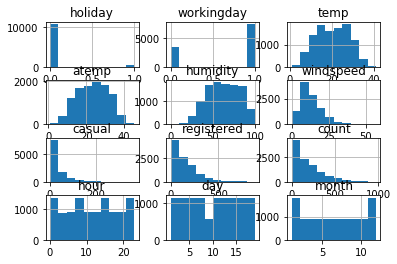

In [11]:
# View histogram of all features again now with the hour feature
test = test.drop('datetime',axis=1)
train = train.drop('datetime',axis=1)
train.hist()

## Step 5: Rerun the model with the same settings as before, just with more features

In [49]:
predictor_new_features = TabularPredictor(label = 'count', eval_metric='root_mean_squared_error').fit(train.drop(['casual','registered'],axis=1),time_limit=600,presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20220128_151936/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220128_151936/"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 11
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2053.39 MB
	Train Data (Original)  Memory Usage: 0.81 MB (0.0% of available memory)
	Inferring data type of each feature based on column v

[1000]	train_set's rmse: 48.9044	valid_set's rmse: 58.5062
[2000]	train_set's rmse: 41.3506	valid_set's rmse: 55.2925
[3000]	train_set's rmse: 36.859	valid_set's rmse: 53.7647
[4000]	train_set's rmse: 33.6032	valid_set's rmse: 52.847
[5000]	train_set's rmse: 31.1554	valid_set's rmse: 52.2178
[6000]	train_set's rmse: 29.1287	valid_set's rmse: 51.86
[7000]	train_set's rmse: 27.4121	valid_set's rmse: 51.5546
[8000]	train_set's rmse: 25.9278	valid_set's rmse: 51.4031
[9000]	train_set's rmse: 24.6316	valid_set's rmse: 51.318
[10000]	train_set's rmse: 23.4921	valid_set's rmse: 51.2731


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 49.076	valid_set's rmse: 61.5283
[2000]	train_set's rmse: 41.65	valid_set's rmse: 57.0928
[3000]	train_set's rmse: 37.102	valid_set's rmse: 55.1783
[4000]	train_set's rmse: 33.8695	valid_set's rmse: 53.9665
[5000]	train_set's rmse: 31.4721	valid_set's rmse: 53.3942
[6000]	train_set's rmse: 29.4826	valid_set's rmse: 52.9293
[7000]	train_set's rmse: 27.764	valid_set's rmse: 52.5594
[8000]	train_set's rmse: 26.286	valid_set's rmse: 52.2535
[9000]	train_set's rmse: 24.971	valid_set's rmse: 52.0743
[10000]	train_set's rmse: 23.7843	valid_set's rmse: 51.8779


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 49.3605	valid_set's rmse: 57.9867
[2000]	train_set's rmse: 41.7928	valid_set's rmse: 55.3314
[3000]	train_set's rmse: 37.2396	valid_set's rmse: 54.0667
[4000]	train_set's rmse: 34.1549	valid_set's rmse: 53.2578
[5000]	train_set's rmse: 31.7023	valid_set's rmse: 52.6761
[6000]	train_set's rmse: 29.6814	valid_set's rmse: 52.2346
[7000]	train_set's rmse: 28.0041	valid_set's rmse: 52.0458
[8000]	train_set's rmse: 26.52	valid_set's rmse: 51.798
[9000]	train_set's rmse: 25.2438	valid_set's rmse: 51.6011
[10000]	train_set's rmse: 24.0943	valid_set's rmse: 51.4968


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 48.8076	valid_set's rmse: 65.3452
[2000]	train_set's rmse: 41.2579	valid_set's rmse: 61.5786
[3000]	train_set's rmse: 36.8	valid_set's rmse: 59.5796
[4000]	train_set's rmse: 33.6235	valid_set's rmse: 58.3909
[5000]	train_set's rmse: 31.1005	valid_set's rmse: 57.5394
[6000]	train_set's rmse: 29.0853	valid_set's rmse: 56.9379
[7000]	train_set's rmse: 27.4081	valid_set's rmse: 56.525
[8000]	train_set's rmse: 25.9262	valid_set's rmse: 56.1288
[9000]	train_set's rmse: 24.6633	valid_set's rmse: 55.8774
[10000]	train_set's rmse: 23.5406	valid_set's rmse: 55.6773


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 49.5446	valid_set's rmse: 57.1767
[2000]	train_set's rmse: 41.7965	valid_set's rmse: 54.1505
[3000]	train_set's rmse: 37.3078	valid_set's rmse: 52.7393
[4000]	train_set's rmse: 34.1296	valid_set's rmse: 51.8955
[5000]	train_set's rmse: 31.6612	valid_set's rmse: 51.2614
[6000]	train_set's rmse: 29.6607	valid_set's rmse: 50.8592
[7000]	train_set's rmse: 27.978	valid_set's rmse: 50.5376
[8000]	train_set's rmse: 26.498	valid_set's rmse: 50.2821
[9000]	train_set's rmse: 25.2442	valid_set's rmse: 50.1288
[10000]	train_set's rmse: 24.1079	valid_set's rmse: 50.0295


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 48.9939	valid_set's rmse: 62.2439
[2000]	train_set's rmse: 41.2357	valid_set's rmse: 59.3721
[3000]	train_set's rmse: 36.71	valid_set's rmse: 58.0591
[4000]	train_set's rmse: 33.516	valid_set's rmse: 57.3296
[5000]	train_set's rmse: 31.1209	valid_set's rmse: 56.8391
[6000]	train_set's rmse: 29.0925	valid_set's rmse: 56.5041
[7000]	train_set's rmse: 27.4476	valid_set's rmse: 56.33
[8000]	train_set's rmse: 25.9711	valid_set's rmse: 56.1373
[9000]	train_set's rmse: 24.6845	valid_set's rmse: 56.01
[10000]	train_set's rmse: 23.5475	valid_set's rmse: 55.945


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 49.4523	valid_set's rmse: 59.7637
[2000]	train_set's rmse: 41.9033	valid_set's rmse: 55.5804
[3000]	train_set's rmse: 37.4716	valid_set's rmse: 53.8728
[4000]	train_set's rmse: 34.2018	valid_set's rmse: 52.8468
[5000]	train_set's rmse: 31.656	valid_set's rmse: 52.2064
[6000]	train_set's rmse: 29.5762	valid_set's rmse: 51.8682
[7000]	train_set's rmse: 27.8415	valid_set's rmse: 51.626
[8000]	train_set's rmse: 26.2925	valid_set's rmse: 51.4244
[9000]	train_set's rmse: 24.9907	valid_set's rmse: 51.2622
[10000]	train_set's rmse: 23.8126	valid_set's rmse: 51.1971


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 49.3178	valid_set's rmse: 61.8269
[2000]	train_set's rmse: 41.6386	valid_set's rmse: 58.4412
[3000]	train_set's rmse: 37.2481	valid_set's rmse: 56.9088
[4000]	train_set's rmse: 34.0489	valid_set's rmse: 55.9831
[5000]	train_set's rmse: 31.5287	valid_set's rmse: 55.2498
[6000]	train_set's rmse: 29.471	valid_set's rmse: 54.5829
[7000]	train_set's rmse: 27.7202	valid_set's rmse: 54.2989
[8000]	train_set's rmse: 26.2293	valid_set's rmse: 53.9764
[9000]	train_set's rmse: 24.9505	valid_set's rmse: 53.712
[10000]	train_set's rmse: 23.8083	valid_set's rmse: 53.4973


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 48.8209	valid_set's rmse: 59.6892
[2000]	train_set's rmse: 41.1381	valid_set's rmse: 57.1399
[3000]	train_set's rmse: 36.7199	valid_set's rmse: 55.8847
[4000]	train_set's rmse: 33.5767	valid_set's rmse: 55.1717
[5000]	train_set's rmse: 31.1023	valid_set's rmse: 54.6279
[6000]	train_set's rmse: 29.1048	valid_set's rmse: 54.1752
[7000]	train_set's rmse: 27.4092	valid_set's rmse: 53.9394
[8000]	train_set's rmse: 25.978	valid_set's rmse: 53.7219
[9000]	train_set's rmse: 24.6942	valid_set's rmse: 53.528
[10000]	train_set's rmse: 23.5357	valid_set's rmse: 53.4824


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 49.9083	valid_set's rmse: 56.2102
[2000]	train_set's rmse: 42.101	valid_set's rmse: 53.324
[3000]	train_set's rmse: 37.6069	valid_set's rmse: 51.772
[4000]	train_set's rmse: 34.4141	valid_set's rmse: 50.7136
[5000]	train_set's rmse: 31.9408	valid_set's rmse: 50.1177
[6000]	train_set's rmse: 29.868	valid_set's rmse: 49.6156
[7000]	train_set's rmse: 28.1437	valid_set's rmse: 49.2995
[8000]	train_set's rmse: 26.6001	valid_set's rmse: 49.0901
[9000]	train_set's rmse: 25.3058	valid_set's rmse: 48.9468
[10000]	train_set's rmse: 24.1666	valid_set's rmse: 48.8306


	-52.3719	 = Validation score   (root_mean_squared_error)
	146.03s	 = Training   runtime
	13.81s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 218.46s of the 418.49s of remaining time.
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 33.3592	valid_set's rmse: 52.5918
[2000]	train_set's rmse: 23.759	valid_set's rmse: 50.5573
[3000]	train_set's rmse: 18.5382	valid_set's rmse: 50.0138
[4000]	train_set's rmse: 15.0877	valid_set's rmse: 49.9663


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 33.0751	valid_set's rmse: 54.5715
[2000]	train_set's rmse: 23.9171	valid_set's rmse: 52.2193
[3000]	train_set's rmse: 18.9315	valid_set's rmse: 51.3141
[4000]	train_set's rmse: 15.467	valid_set's rmse: 50.8911
[5000]	train_set's rmse: 12.7863	valid_set's rmse: 50.818
[6000]	train_set's rmse: 10.8191	valid_set's rmse: 50.8082


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 33.3105	valid_set's rmse: 53.1549
[2000]	train_set's rmse: 24.2697	valid_set's rmse: 51.2275
[3000]	train_set's rmse: 19.401	valid_set's rmse: 50.4764
[4000]	train_set's rmse: 15.7236	valid_set's rmse: 50.3236
[5000]	train_set's rmse: 12.8988	valid_set's rmse: 50.3997


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 32.5463	valid_set's rmse: 60.1829
[2000]	train_set's rmse: 23.4948	valid_set's rmse: 57.9184
[3000]	train_set's rmse: 18.2966	valid_set's rmse: 57.4338
[4000]	train_set's rmse: 14.9832	valid_set's rmse: 56.9543
[5000]	train_set's rmse: 12.5574	valid_set's rmse: 56.8715
[6000]	train_set's rmse: 10.6433	valid_set's rmse: 56.7687
[7000]	train_set's rmse: 9.22102	valid_set's rmse: 56.6909
[8000]	train_set's rmse: 7.96365	valid_set's rmse: 56.6698
[9000]	train_set's rmse: 6.94366	valid_set's rmse: 56.7068


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 33.4723	valid_set's rmse: 53.5351
[2000]	train_set's rmse: 24.2422	valid_set's rmse: 51.9254
[3000]	train_set's rmse: 19.1923	valid_set's rmse: 51.4401
[4000]	train_set's rmse: 15.6558	valid_set's rmse: 51.1402
[5000]	train_set's rmse: 13.0853	valid_set's rmse: 50.9956
[6000]	train_set's rmse: 11.1529	valid_set's rmse: 51.017


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 33.0582	valid_set's rmse: 59.0037
[2000]	train_set's rmse: 23.9462	valid_set's rmse: 57.1527
[3000]	train_set's rmse: 18.8212	valid_set's rmse: 56.5909
[4000]	train_set's rmse: 15.3654	valid_set's rmse: 56.1695


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 33.1019	valid_set's rmse: 56.3277
[2000]	train_set's rmse: 23.8424	valid_set's rmse: 54.9066
[3000]	train_set's rmse: 18.9649	valid_set's rmse: 54.7537
[4000]	train_set's rmse: 15.2679	valid_set's rmse: 54.8261


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 32.796	valid_set's rmse: 54.666
[2000]	train_set's rmse: 24.2556	valid_set's rmse: 52.5589
[3000]	train_set's rmse: 18.9353	valid_set's rmse: 51.6378
[4000]	train_set's rmse: 15.4278	valid_set's rmse: 51.3155
[5000]	train_set's rmse: 12.848	valid_set's rmse: 51.1867
[6000]	train_set's rmse: 10.8293	valid_set's rmse: 50.9674
[7000]	train_set's rmse: 9.3828	valid_set's rmse: 50.8947
[8000]	train_set's rmse: 8.20521	valid_set's rmse: 50.8313
[9000]	train_set's rmse: 7.13663	valid_set's rmse: 50.8066
[10000]	train_set's rmse: 6.31845	valid_set's rmse: 50.854


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 32.9084	valid_set's rmse: 56.8177
[2000]	train_set's rmse: 24.0182	valid_set's rmse: 54.7819
[3000]	train_set's rmse: 18.7338	valid_set's rmse: 54.2045
[4000]	train_set's rmse: 15.1193	valid_set's rmse: 54.0339


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 33.094	valid_set's rmse: 51.5457
[2000]	train_set's rmse: 24.2495	valid_set's rmse: 49.9594
[3000]	train_set's rmse: 19.1972	valid_set's rmse: 49.5207


	-52.4215	 = Validation score   (root_mean_squared_error)
	74.32s	 = Training   runtime
	3.9s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 129.52s of the 329.55s of remaining time.
	-64.1606	 = Validation score   (root_mean_squared_error)
	7.62s	 = Training   runtime
	0.43s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 118.96s of the 318.99s of remaining time.
	Time limit exceeded... Skipping CatBoost_BAG_L1.
Fitting model: ExtraTreesMSE_BAG_L1 ... Training model for up to 105.81s of the 305.84s of remaining time.
	-64.0834	 = Validation score   (root_mean_squared_error)
	3.61s	 = Training   runtime
	0.42s	 = Validation runtime
Fitting model: NeuralNetFastAI_BAG_L1 ... Training model for up to 99.45s of the 299.48s of remaining time.
	Ran out of time, stopping training early. (Stopping on epoch 11)
	Ran out of time, stopping training early. (Stopping on epoch 12)
	Ran out of time, stopping training early. (

In [50]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -49.204354      21.103523  503.513420                0.000593           0.237572            3       True         16
1     ExtraTreesMSE_BAG_L2  -49.851451      19.926549  334.783902                0.470471           6.218708            2       True         14
2          CatBoost_BAG_L2  -49.876965      19.513299  365.524678                0.057221          36.959483            2       True         13
3   RandomForestMSE_BAG_L2  -49.925733      20.003747  351.612251                0.547669          23.047056            2       True         12
4          LightGBM_BAG_L2  -50.006732      19.577491  336.168364                0.121413           7.603169            2       True         11
5   NeuralNetFastAI_BAG_L2  -50.722211      19.906155  429.447432         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -123.92263994015849,
  'KNeighborsDist_BAG_L1': -119.3733944800320

In [51]:
# Remember to set all negative values to zero
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features[predictions_new_features < 0] = 0
predictions_new_features.describe()

count    6493.000000
mean      189.211838
std       163.604721
min         0.894742
25%        49.671211
50%       152.066132
75%       275.567444
max       834.158081
Name: count, dtype: float64

In [54]:
# Same submitting predictions
submission["count"] = predictions_new_features
submission.to_csv("submission_new_features.csv", index=False)

In [55]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 436kB/s]
Successfully submitted to Bike Sharing Demand

In [56]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission_new_features.csv  2022-01-28 15:35:01  new features          complete  0.55365      0.55365       
submission.csv               2022-01-28 15:06:39  first raw submission  complete  1.39382      1.39382       


#### New Score of 0.55

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [12]:
import autogluon.core as ag
import scipy.stats as st

num_trials = 5
search_strategy = 'auto'

hyperparameter_tune_kwargs = {
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

predictor_new_hpo = TabularPredictor(label = 'count', eval_metric='root_mean_squared_error').fit(train.drop(['casual','registered'],axis=1),
                                                                                                 auto_stack=True,
                                                                                                 time_limit=600,
                                                                                                 hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
                                                                                                 presets='best_quality'
                                                                                                 )

No path specified. Models will be saved in: "AutogluonModels/ag-20220128_195043/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 1000s
AutoGluon will save models to "AutogluonModels/ag-20220128_195043/"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 11
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    3019.13 MB
	Train Data (Original)  Memory Usage: 0.81 MB (0.0% of available memory)
	Inferring data type of each feature based on column 

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 49.304	valid_set's rmse: 58.8439
[2000]	train_set's rmse: 41.473	valid_set's rmse: 55.1067
[3000]	train_set's rmse: 37.0049	valid_set's rmse: 53.5171


	Ran out of time, early stopping on iteration 4046. Best iteration is:
	[4040]	train_set's rmse: 33.6867	valid_set's rmse: 52.5123


[4000]	train_set's rmse: 33.7976	valid_set's rmse: 52.5554


	Time limit exceeded
Fitted model: LightGBMXT_BAG_L1/T0 ...
	-52.5123	 = Validation score   (root_mean_squared_error)
	4.82s	 = Training   runtime
	0.33s	 = Validation runtime
Hyperparameter tuning model: LightGBM_BAG_L1 ...


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 33.3592	valid_set's rmse: 52.5918
[2000]	train_set's rmse: 23.759	valid_set's rmse: 50.5573
[3000]	train_set's rmse: 18.5382	valid_set's rmse: 50.0138
[4000]	train_set's rmse: 15.0877	valid_set's rmse: 49.9663


	Time limit exceeded
Fitted model: LightGBM_BAG_L1/T0 ...
	-49.9053	 = Validation score   (root_mean_squared_error)
	4.51s	 = Training   runtime
	0.24s	 = Validation runtime
Hyperparameter tuning model: RandomForestMSE_BAG_L1 ...
Fitted model: RandomForestMSE_BAG_L1/T0 ...
	-64.1606	 = Validation score   (root_mean_squared_error)
	7.65s	 = Training   runtime
	0.42s	 = Validation runtime
Hyperparameter tuning model: CatBoost_BAG_L1 ...


	Time limit exceeded
Fitted model: CatBoost_BAG_L1/T0 ...
	-61.6597	 = Validation score   (root_mean_squared_error)
	5.01s	 = Training   runtime
	0.01s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L1 ...
Fitted model: ExtraTreesMSE_BAG_L1/T0 ...
	-64.0834	 = Validation score   (root_mean_squared_error)
	3.51s	 = Training   runtime
	0.41s	 = Validation runtime
Hyperparameter tuning model: NeuralNetFastAI_BAG_L1 ...
	Ran out of time, stopping training early. (Stopping on epoch 12)
Fitted model: NeuralNetFastAI_BAG_L1/T0 ...
	-121.2976	 = Validation score   (root_mean_squared_error)
	6.17s	 = Training   runtime
	0.03s	 = Validation runtime
Hyperparameter tuning model: XGBoost_BAG_L1 ...


	Time limit exceeded
Fitted model: XGBoost_BAG_L1/T0 ...
	-53.5599	 = Validation score   (root_mean_squared_error)
	3.96s	 = Training   runtime
	0.04s	 = Validation runtime
Hyperparameter tuning model: NeuralNetMXNet_BAG_L1 ...


	Ran out of time, stopping training early. (Stopping on epoch 2)
	Time limit exceeded
Fitted model: NeuralNetMXNet_BAG_L1/T0 ...
	-241.5156	 = Validation score   (root_mean_squared_error)
	3.15s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 5.45s of the 937.14s of remaining time.
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 13.5128	valid_set's rmse: 51.522
[2000]	train_set's rmse: 6.27056	valid_set's rmse: 50.776


	Ran out of time, early stopping on iteration 3015. Best iteration is:
	[3015]	train_set's rmse: 3.43781	valid_set's rmse: 50.6229


[3000]	train_set's rmse: 3.46354	valid_set's rmse: 50.6274


	Time limit exceeded... Skipping LightGBMLarge_BAG_L1.
Fitting model: KNeighborsUnif_BAG_L1/T0 ... Training model for up to 596.97s of the 930.42s of remaining time.
	-123.9226	 = Validation score   (root_mean_squared_error)
	0.03s	 = Training   runtime
	0.2s	 = Validation runtime
Fitting model: KNeighborsDist_BAG_L1/T0 ... Training model for up to 596.9s of the 930.36s of remaining time.
	-119.3734	 = Validation score   (root_mean_squared_error)
	0.02s	 = Training   runtime
	0.2s	 = Validation runtime
Fitting model: LightGBMXT_BAG_L1/T0 ... Training model for up to 596.83s of the 930.29s of remaining time.
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 49.076	valid_set's rmse: 61.5283
[2000]	train_set's rmse: 41.65	valid_set's rmse: 57.0928
[3000]	train_set's rmse: 37.102	valid_set's rmse: 55.1783
[4000]	train_set's rmse: 33.8695	valid_set's rmse: 53.9665
[5000]	train_set's rmse: 31.4721	valid_set's rmse: 53.3942
[6000]	train_set's rmse: 29.4826	valid_set's rmse: 52.9293
[7000]	train_set's rmse: 27.764	valid_set's rmse: 52.5594
[8000]	train_set's rmse: 26.286	valid_set's rmse: 52.2535
[9000]	train_set's rmse: 24.971	valid_set's rmse: 52.0743
[10000]	train_set's rmse: 23.7843	valid_set's rmse: 51.8779


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 49.3605	valid_set's rmse: 57.9867
[2000]	train_set's rmse: 41.7928	valid_set's rmse: 55.3314
[3000]	train_set's rmse: 37.2396	valid_set's rmse: 54.0667
[4000]	train_set's rmse: 34.1549	valid_set's rmse: 53.2578
[5000]	train_set's rmse: 31.7023	valid_set's rmse: 52.6761
[6000]	train_set's rmse: 29.6814	valid_set's rmse: 52.2346
[7000]	train_set's rmse: 28.0041	valid_set's rmse: 52.0458
[8000]	train_set's rmse: 26.52	valid_set's rmse: 51.798
[9000]	train_set's rmse: 25.2438	valid_set's rmse: 51.6011
[10000]	train_set's rmse: 24.0943	valid_set's rmse: 51.4968


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 48.8076	valid_set's rmse: 65.3452
[2000]	train_set's rmse: 41.2579	valid_set's rmse: 61.5786
[3000]	train_set's rmse: 36.8	valid_set's rmse: 59.5796
[4000]	train_set's rmse: 33.6235	valid_set's rmse: 58.3909
[5000]	train_set's rmse: 31.1005	valid_set's rmse: 57.5394
[6000]	train_set's rmse: 29.0853	valid_set's rmse: 56.9379
[7000]	train_set's rmse: 27.4081	valid_set's rmse: 56.525
[8000]	train_set's rmse: 25.9262	valid_set's rmse: 56.1288
[9000]	train_set's rmse: 24.6633	valid_set's rmse: 55.8774
[10000]	train_set's rmse: 23.5406	valid_set's rmse: 55.6773


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 49.5446	valid_set's rmse: 57.1767
[2000]	train_set's rmse: 41.7965	valid_set's rmse: 54.1505
[3000]	train_set's rmse: 37.3078	valid_set's rmse: 52.7393
[4000]	train_set's rmse: 34.1296	valid_set's rmse: 51.8955
[5000]	train_set's rmse: 31.6612	valid_set's rmse: 51.2614
[6000]	train_set's rmse: 29.6607	valid_set's rmse: 50.8592
[7000]	train_set's rmse: 27.978	valid_set's rmse: 50.5376
[8000]	train_set's rmse: 26.498	valid_set's rmse: 50.2821
[9000]	train_set's rmse: 25.2442	valid_set's rmse: 50.1288
[10000]	train_set's rmse: 24.1079	valid_set's rmse: 50.0295


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 48.9939	valid_set's rmse: 62.2439
[2000]	train_set's rmse: 41.2357	valid_set's rmse: 59.3721
[3000]	train_set's rmse: 36.71	valid_set's rmse: 58.0591
[4000]	train_set's rmse: 33.516	valid_set's rmse: 57.3296
[5000]	train_set's rmse: 31.1209	valid_set's rmse: 56.8391
[6000]	train_set's rmse: 29.0925	valid_set's rmse: 56.5041
[7000]	train_set's rmse: 27.4476	valid_set's rmse: 56.33
[8000]	train_set's rmse: 25.9711	valid_set's rmse: 56.1373
[9000]	train_set's rmse: 24.6845	valid_set's rmse: 56.01
[10000]	train_set's rmse: 23.5475	valid_set's rmse: 55.945


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 49.4523	valid_set's rmse: 59.7637
[2000]	train_set's rmse: 41.9033	valid_set's rmse: 55.5804
[3000]	train_set's rmse: 37.4716	valid_set's rmse: 53.8728
[4000]	train_set's rmse: 34.2018	valid_set's rmse: 52.8468
[5000]	train_set's rmse: 31.656	valid_set's rmse: 52.2064
[6000]	train_set's rmse: 29.5762	valid_set's rmse: 51.8682
[7000]	train_set's rmse: 27.8415	valid_set's rmse: 51.626
[8000]	train_set's rmse: 26.2925	valid_set's rmse: 51.4244
[9000]	train_set's rmse: 24.9907	valid_set's rmse: 51.2622
[10000]	train_set's rmse: 23.8126	valid_set's rmse: 51.1971


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 49.3178	valid_set's rmse: 61.8269
[2000]	train_set's rmse: 41.6386	valid_set's rmse: 58.4412
[3000]	train_set's rmse: 37.2481	valid_set's rmse: 56.9088
[4000]	train_set's rmse: 34.0489	valid_set's rmse: 55.9831
[5000]	train_set's rmse: 31.5287	valid_set's rmse: 55.2498
[6000]	train_set's rmse: 29.471	valid_set's rmse: 54.5829
[7000]	train_set's rmse: 27.7202	valid_set's rmse: 54.2989
[8000]	train_set's rmse: 26.2293	valid_set's rmse: 53.9764
[9000]	train_set's rmse: 24.9505	valid_set's rmse: 53.712
[10000]	train_set's rmse: 23.8083	valid_set's rmse: 53.4973


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 48.8209	valid_set's rmse: 59.6892
[2000]	train_set's rmse: 41.1381	valid_set's rmse: 57.1399
[3000]	train_set's rmse: 36.7199	valid_set's rmse: 55.8847
[4000]	train_set's rmse: 33.5767	valid_set's rmse: 55.1717
[5000]	train_set's rmse: 31.1023	valid_set's rmse: 54.6279
[6000]	train_set's rmse: 29.1048	valid_set's rmse: 54.1752
[7000]	train_set's rmse: 27.4092	valid_set's rmse: 53.9394
[8000]	train_set's rmse: 25.978	valid_set's rmse: 53.7219
[9000]	train_set's rmse: 24.6942	valid_set's rmse: 53.528
[10000]	train_set's rmse: 23.5357	valid_set's rmse: 53.4824


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 49.9083	valid_set's rmse: 56.2102
[2000]	train_set's rmse: 42.101	valid_set's rmse: 53.324
[3000]	train_set's rmse: 37.6069	valid_set's rmse: 51.772
[4000]	train_set's rmse: 34.4141	valid_set's rmse: 50.7136
[5000]	train_set's rmse: 31.9408	valid_set's rmse: 50.1177
[6000]	train_set's rmse: 29.868	valid_set's rmse: 49.6156
[7000]	train_set's rmse: 28.1437	valid_set's rmse: 49.2995
[8000]	train_set's rmse: 26.6001	valid_set's rmse: 49.0901
[9000]	train_set's rmse: 25.3058	valid_set's rmse: 48.9468
[10000]	train_set's rmse: 24.1666	valid_set's rmse: 48.8306


	-52.4957	 = Validation score   (root_mean_squared_error)
	96.18s	 = Training   runtime
	15.48s	 = Validation runtime
Fitting model: LightGBM_BAG_L1/T0 ... Training model for up to 471.84s of the 805.3s of remaining time.
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 33.0751	valid_set's rmse: 54.5715
[2000]	train_set's rmse: 23.9171	valid_set's rmse: 52.2193
[3000]	train_set's rmse: 18.9315	valid_set's rmse: 51.3141
[4000]	train_set's rmse: 15.467	valid_set's rmse: 50.8911
[5000]	train_set's rmse: 12.7863	valid_set's rmse: 50.818
[6000]	train_set's rmse: 10.8191	valid_set's rmse: 50.8082


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 33.3105	valid_set's rmse: 53.1549
[2000]	train_set's rmse: 24.2697	valid_set's rmse: 51.2275
[3000]	train_set's rmse: 19.401	valid_set's rmse: 50.4764
[4000]	train_set's rmse: 15.7236	valid_set's rmse: 50.3236
[5000]	train_set's rmse: 12.8988	valid_set's rmse: 50.3997


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 32.5463	valid_set's rmse: 60.1829
[2000]	train_set's rmse: 23.4948	valid_set's rmse: 57.9184
[3000]	train_set's rmse: 18.2966	valid_set's rmse: 57.4338
[4000]	train_set's rmse: 14.9832	valid_set's rmse: 56.9543
[5000]	train_set's rmse: 12.5574	valid_set's rmse: 56.8715
[6000]	train_set's rmse: 10.6433	valid_set's rmse: 56.7687
[7000]	train_set's rmse: 9.22102	valid_set's rmse: 56.6909
[8000]	train_set's rmse: 7.96365	valid_set's rmse: 56.6698
[9000]	train_set's rmse: 6.94366	valid_set's rmse: 56.7068


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 33.4723	valid_set's rmse: 53.5351
[2000]	train_set's rmse: 24.2422	valid_set's rmse: 51.9254
[3000]	train_set's rmse: 19.1923	valid_set's rmse: 51.4401
[4000]	train_set's rmse: 15.6558	valid_set's rmse: 51.1402
[5000]	train_set's rmse: 13.0853	valid_set's rmse: 50.9956
[6000]	train_set's rmse: 11.1529	valid_set's rmse: 51.017


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 33.0582	valid_set's rmse: 59.0037
[2000]	train_set's rmse: 23.9462	valid_set's rmse: 57.1527
[3000]	train_set's rmse: 18.8212	valid_set's rmse: 56.5909
[4000]	train_set's rmse: 15.3654	valid_set's rmse: 56.1695


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 33.1019	valid_set's rmse: 56.3277
[2000]	train_set's rmse: 23.8424	valid_set's rmse: 54.9066
[3000]	train_set's rmse: 18.9649	valid_set's rmse: 54.7537
[4000]	train_set's rmse: 15.2679	valid_set's rmse: 54.8261


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 32.796	valid_set's rmse: 54.666
[2000]	train_set's rmse: 24.2556	valid_set's rmse: 52.5589
[3000]	train_set's rmse: 18.9353	valid_set's rmse: 51.6378
[4000]	train_set's rmse: 15.4278	valid_set's rmse: 51.3155
[5000]	train_set's rmse: 12.848	valid_set's rmse: 51.1867
[6000]	train_set's rmse: 10.8293	valid_set's rmse: 50.9674
[7000]	train_set's rmse: 9.3828	valid_set's rmse: 50.8947
[8000]	train_set's rmse: 8.20521	valid_set's rmse: 50.8313
[9000]	train_set's rmse: 7.13663	valid_set's rmse: 50.8066
[10000]	train_set's rmse: 6.31845	valid_set's rmse: 50.854


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 32.9084	valid_set's rmse: 56.8177
[2000]	train_set's rmse: 24.0182	valid_set's rmse: 54.7819
[3000]	train_set's rmse: 18.7338	valid_set's rmse: 54.2045
[4000]	train_set's rmse: 15.1193	valid_set's rmse: 54.0339


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 33.094	valid_set's rmse: 51.5457
[2000]	train_set's rmse: 24.2495	valid_set's rmse: 49.9594
[3000]	train_set's rmse: 19.1972	valid_set's rmse: 49.5207


	-52.4215	 = Validation score   (root_mean_squared_error)
	53.6s	 = Training   runtime
	5.19s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1/T0 ... Training model for up to 408.32s of the 741.78s of remaining time.
	-64.1606	 = Validation score   (root_mean_squared_error)
	7.65s	 = Training   runtime
	0.42s	 = Validation runtime
Fitting model: CatBoost_BAG_L1/T0 ... Training model for up to 408.25s of the 741.71s of remaining time.
	Time limit exceeded... Skipping CatBoost_BAG_L1/T0.
Fitting model: ExtraTreesMSE_BAG_L1/T0 ... Training model for up to 351.34s of the 684.8s of remaining time.
	-64.0834	 = Validation score   (root_mean_squared_error)
	3.51s	 = Training   runtime
	0.41s	 = Validation runtime
Fitting model: NeuralNetFastAI_BAG_L1/T0 ... Training model for up to 351.27s of the 684.73s of remaining time.
	-75.2247	 = Validation score   (root_mean_squared_error)
	97.34s	 = Training   runtime
	0.27s	 = Validation runtime
Fitting model: XGBoost_BAG_L1/T0 ... Trainin

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	Time limit exceeded
Fitted model: LightGBMXT_BAG_L2/T0 ...
	-51.9791	 = Validation score   (root_mean_squared_error)
	1.74s	 = Training   runtime
	0.05s	 = Validation runtime
Hyperparameter tuning model: LightGBM_BAG_L2 ...


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a f

	Time limit exceeded
Fitted model: CatBoost_BAG_L2/T0 ...
	-51.354	 = Validation score   (root_mean_squared_error)
	3.41s	 = Training   runtime
	0.01s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L2 ...
Fitted model: ExtraTreesMSE_BAG_L2/T0 ...
	-50.0104	 = Validation score   (root_mean_squared_error)
	6.51s	 = Training   runtime
	0.46s	 = Validation runtime
Hyperparameter tuning model: NeuralNetFastAI_BAG_L2 ...
	Ran out of time, stopping training early. (Stopping on epoch 3)
Fitted model: NeuralNetFastAI_BAG_L2/T0 ...
	-52.5066	 = Validation score   (root_mean_squared_error)
	2.3s	 = Training   runtime
	0.04s	 = Validation runtime
Hyperparameter tuning model: XGBoost_BAG_L2 ...


	Time limit exceeded
Fitted model: XGBoost_BAG_L2/T0 ...
	-49.9643	 = Validation score   (root_mean_squared_error)
	1.26s	 = Training   runtime
	0.02s	 = Validation runtime
Hyperparameter tuning model: NeuralNetMXNet_BAG_L2 ...


	Ran out of time, stopping training early. (Stopping on epoch 0)
	Time limit exceeded


Fitted model: NeuralNetMXNet_BAG_L2/T0 ...
	-214.2196	 = Validation score   (root_mean_squared_error)
	1.09s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L2 ... Training model for up to 3.41s of the 281.64s of remaining time.
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	Ran out of time, early stopping on iteration 439. Best iteration is:
	[293]	train_set's rmse: 19.6163	valid_set's rmse: 49.9769
	-49.9769	 = Validation score   (root_mean_squared_error)
	2.96s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: LightGBMXT_BAG_L2/T0 ... Training model for up to 278.34s of the 278.31s of remaining time.
/opt/conda/lib/python3.7/site-packages/l

In [13]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                        model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0         WeightedEnsemble_L3  -49.126444      25.817039  767.562292                0.000561           0.338698            3       True         23
1   NeuralNetFastAI_BAG_L2/T0  -49.908994      24.720190  670.997763                0.431668         160.548789            2       True         19
2        LightGBMLarge_BAG_L2  -49.976948      24.314796  513.413540                0.026273           2.964566            2       True         22
3     ExtraTreesMSE_BAG_L2/T0  -50.010404      24.749081  516.962172                0.460558           6.513198            2       True         18
4   RandomForestMSE_BAG_L2/T0  -50.014230      24.746495  535.600368                0.457973          25.151394            2       True         16
5          CatBoost_BAG_L2/T0  -50.017490      24.346304

{'model_types': {'KNeighborsUnif_BAG_L1/T0': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1/T0': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1/T0': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T0': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1/T0': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1/T0': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1/T0': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1/T0': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1/T0': 'StackerEnsembleModel_XGBoost',
  'NeuralNetMXNet_BAG_L1/T0': 'StackerEnsembleModel_TabularNeuralNet',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2/T0': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T0': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2/T0': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2/T0': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG

In [14]:
# Remember to set all negative values to zero
predictor_new_hpo = predictor_new_hpo.predict(test)
predictor_new_hpo[predictor_new_hpo < 0] = 0
predictor_new_hpo.describe()

count    6493.000000
mean      188.789093
std       164.428848
min         0.000000
25%        49.361053
50%       150.457275
75%       275.510132
max       841.034363
Name: count, dtype: float64

In [17]:
# Same submitting predictions
submission["count"] = predictor_new_hpo
submission.to_csv("submission_new_hpo.csv", index=False)

In [18]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 470kB/s]
Successfully submitted to Bike Sharing Demand

In [19]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2022-01-28 20:16:39  new features with hyperparameters  complete  0.56647      0.56647       
submission_new_features.csv  2022-01-28 15:35:01  new features                       complete  0.55365      0.55365       
submission.csv               2022-01-28 15:06:39  first raw submission               complete  1.39382      1.39382       


#### New Score of 0.56

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

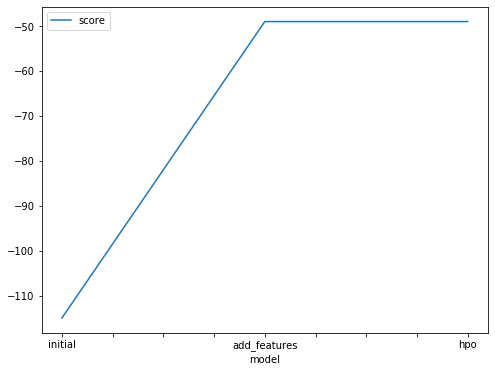

In [22]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-115, -49, -49]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

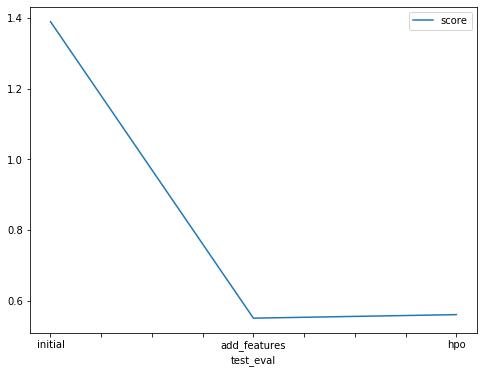

In [23]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.39, 0.55, 0.56]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [28]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ['time_limit=600','time_limit=600','time_limit=600'],
    "hpo2": ['presets=best_quality','presets=best_quality','presets=best_quality'],
    "hpo3": ['/','/','auto_stack=True,hyperparameter_tune_kwargs=num_trials: num_trials,scheduler:local,searcher:search_strategy'],
    "score": [1.39, 0.55, 0.56]
})

model            hpo1                  hpo2  \
0       initial  time_limit=600  presets=best_quality   
1  add_features  time_limit=600  presets=best_quality   
2           hpo  time_limit=600  presets=best_quality   

                                                                                                         hpo3  \
0                                                                                                           /   
1                                                                                                           /   
2  auto_stack=True,hyperparameter_tune_kwargs=num_trials: num_trials,scheduler:local,searcher:search_strategy   

   score  
0   1.39  
1   0.55  
2   0.56